In [1]:
import os
import sys
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

REPORT_NAME : str = "backtest_fibonacci_d_mv_crypto"
CACHE_CANDLES : str = f"{os.path.dirname(sys.path[0])}\\cache\\candles"

### BTC

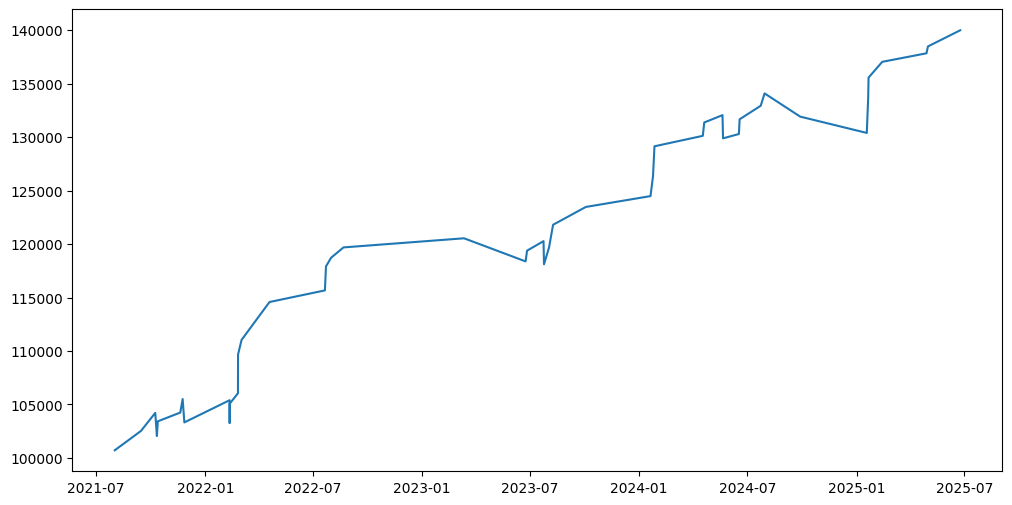

In [5]:
initial_cash = 100000
trade_file = 'backtest_fibonacci_strategy_d_mv_crypto_20210301_BTCUSDTUSDT_trades.csv'

pd_flattenned_trades = pd.read_csv(trade_file)
# pd_flattenned_trades = pd_flattenned_trades[pd_flattenned_trades.name_exclude_start_date==target_scenario_name]
pd_flattenned_trades = pd_flattenned_trades[(pd_flattenned_trades.reason!='entry') & (pd_flattenned_trades.reason!='HC')]
pd_flattenned_trades = pd_flattenned_trades.loc[:,['trade_datetime', 'trade_year', 'trade_month', 'trade_day', 'trade_pnl_less_comm']]
pd_flattenned_trades.sort_values(by=['trade_datetime'], ascending=[True])
pd_flattenned_trades['trade_datetime'] = pd.to_datetime(pd_flattenned_trades['trade_datetime'])
# pd_flattenned_trades = pd_flattenned_trades[pd_flattenned_trades['trade_datetime']>=datetime(2024,1,1)] # If you want to zoom in ...
pd_flattenned_trades['total_equity'] = pd_flattenned_trades['trade_pnl_less_comm'].cumsum()
pd_flattenned_trades['total_equity'] = pd_flattenned_trades['total_equity'] + initial_cash 
pd_flattenned_trades['interval_return'] = pd_flattenned_trades['total_equity'].pct_change()
pd_flattenned_trades['cumulative_interval_return'] = (1 + pd_flattenned_trades['interval_return']).cumprod()
pd_flattenned_trades['trade_datetime'] = pd.to_datetime(pd_flattenned_trades['trade_datetime'])
pd_flattenned_trades.set_index('trade_datetime', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(pd_flattenned_trades.index, pd_flattenned_trades['total_equity'], label='Total Equity')

                    Strategy
------------------  ----------
Start Period        2021-09-14
End Period          2025-06-24
Risk-Free Rate      5.0%
Time in Market      100.0%

Cumulative Return   39.0%
CAGR﹪              6.21%

Sharpe              8.51
Prob. Sharpe Ratio  99.76%
Sortino             15.0
Sortino/√2          10.61
Omega               3.27

Max Drawdown        -2.76%
Longest DD Days     115

Gain/Pain Ratio     2.86
Gain/Pain (1M)      6.96

Payoff Ratio        0.73
Profit Factor       3.36
Common Sense Ratio  4.13
CPC Index           2.0
Tail Ratio          1.23
Outlier Win Ratio   2.58
Outlier Loss Ratio  1.17

MTD                 1.09%
3M                  2.15%
6M                  6.12%
YTD                 6.12%
1Y                  6.32%
3Y (ann.)           4.17%
5Y (ann.)           6.21%
10Y (ann.)          6.21%
All-time (ann.)     6.21%

Avg. Drawdown       -2.13%
Avg. Drawdown Days  52
Recovery Factor     12.13
Ulcer Index         0.01
Serenity Index      23.46


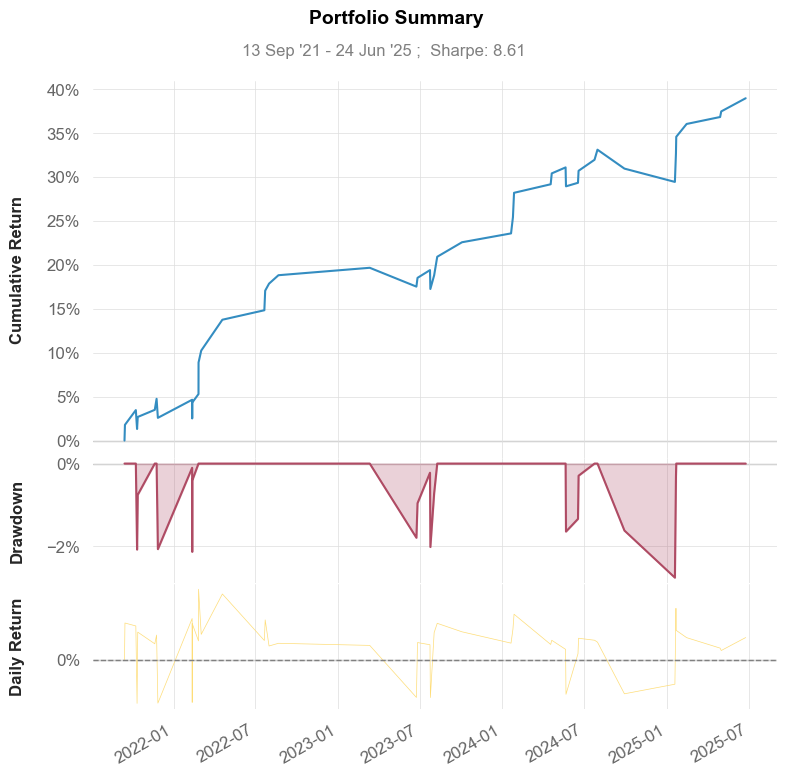

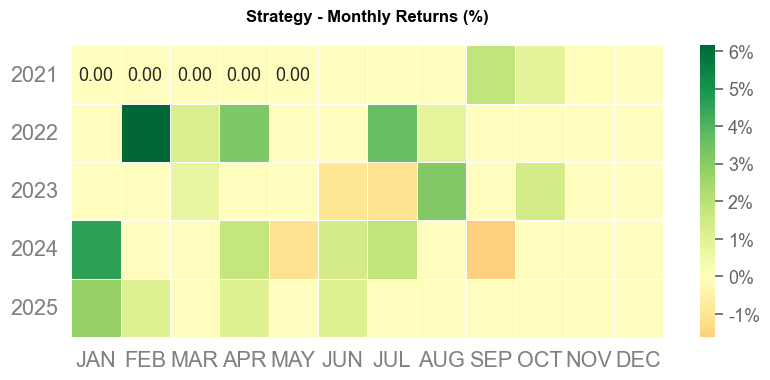

In [6]:
# https://github.com/ranaroussi/quantstats
%matplotlib inline
import quantstats as qs

RISK_FREE_RATE = 0.05 # 5%

qs.reports.basic(
    returns=pd_flattenned_trades['interval_return'], 
    rf=RISK_FREE_RATE,
    title="Tear Sheet"
    )